In [116]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import os
import glob
from scipy.interpolate import interp1d
from scipy.io.idl import readsav
from astropy.table import Table
from astropy.io import ascii
import astropy.units as u
from scipy.optimize import leastsq
import astropy.constants as const
from astropy.convolution import convolve, Box1DKernel
from astropy.modeling import models, fitting
import lightkurve as lk
# from astropy.units import cds
# cds.enable() 
from astropy import time, coordinates as coord

#matplotlib set up
%matplotlib inline
from matplotlib import rcParams
rcParams["figure.figsize"] = (14, 5)
rcParams["font.size"] = 20

Looking at the tgcat data for GD394

In [117]:
# path = '/media/david/1tb_storage1/emergency_data/gd394/chandra/tgcat/'
path = '/media/david/2tb_ext_hd/hddata/gd394/chandra/tgcat/'
obs = glob.glob('{}obs*'.format(path))
obs

['/media/david/2tb_ext_hd/hddata/gd394/chandra/tgcat/obs_21181_tgid_6072',
 '/media/david/2tb_ext_hd/hddata/gd394/chandra/tgcat/obs_22956_tgid_6070']

In [118]:
# os.listdir(obs[0])

In [119]:
# lc1 = fits.open('{}/lc'.format(obs[0]))

In [120]:
# lc1.info()

Filename: /media/david/2tb_ext_hd/hddata/gd394/chandra/tgcat/obs_21181_tgid_6072/lc
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      29   ()      
  1  LIGHTCURVE    1 BinTableHDU    305   52R x 10C   [1J, 1D, 1D, 1D, 1J, 1D, 1D, 1D, 1D, 1D]   
  2  GTI           1 BinTableHDU     26   1R x 2C   [1D, 1D]   


In [121]:
# data = lc1[1].data

In [122]:
# data.names

['TIME_BIN',
 'TIME_MIN',
 'TIME',
 'TIME_MAX',
 'COUNTS',
 'STAT_ERR',
 'AREA',
 'EXPOSURE',
 'COUNT_RATE',
 'COUNT_RATE_ERR']

<ErrorbarContainer object of 3 artists>

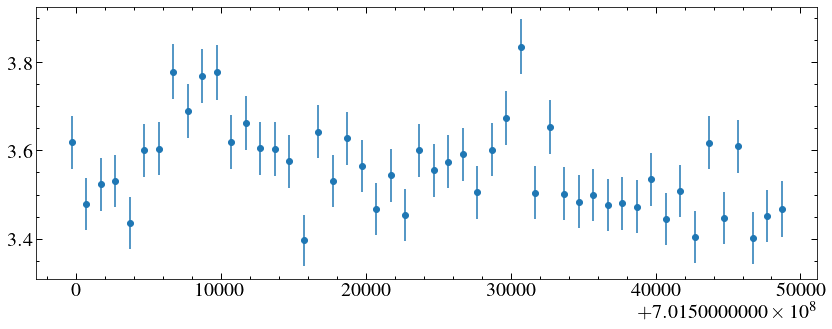

In [123]:
# plt.errorbar(data['TIME'][1:-1], data['COUNT_RATE'][1:-1], yerr=data['COUNT_RATE_ERR'][1:-1], marker='o', ls='none')

In [124]:
# bg1 = fits.open('{}/lc_bg'.format(obs[0]))

In [125]:
# bgdata = bg1[1].data

In [126]:
# bgdata.names

['TIME_BIN',
 'TIME_MIN',
 'TIME',
 'TIME_MAX',
 'COUNTS',
 'STAT_ERR',
 'AREA',
 'EXPOSURE',
 'COUNT_RATE',
 'COUNT_RATE_ERR']

<ErrorbarContainer object of 3 artists>

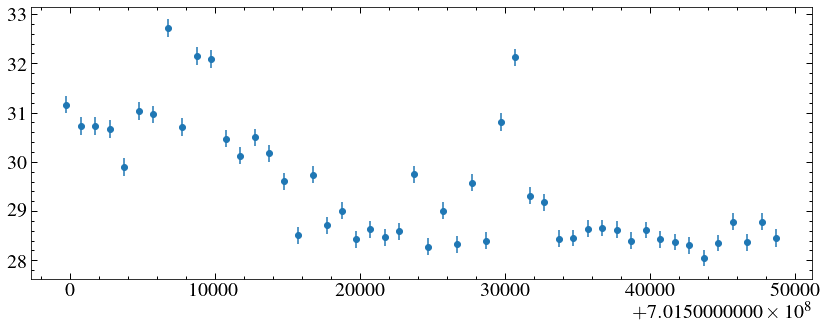

In [127]:
# plt.errorbar(bgdata['TIME'][1:-1], bgdata['COUNT_RATE'][1:-1], yerr=bgdata['COUNT_RATE_ERR'][1:-1], marker='o', ls='none')

In [128]:
# bgdata['TIME']

array([7.01498713e+08, 7.01499713e+08, 7.01500713e+08, 7.01501713e+08,
       7.01502713e+08, 7.01503713e+08, 7.01504713e+08, 7.01505713e+08,
       7.01506713e+08, 7.01507713e+08, 7.01508713e+08, 7.01509713e+08,
       7.01510713e+08, 7.01511713e+08, 7.01512713e+08, 7.01513713e+08,
       7.01514713e+08, 7.01515713e+08, 7.01516713e+08, 7.01517713e+08,
       7.01518713e+08, 7.01519713e+08, 7.01520713e+08, 7.01521713e+08,
       7.01522713e+08, 7.01523713e+08, 7.01524713e+08, 7.01525713e+08,
       7.01526713e+08, 7.01527713e+08, 7.01528713e+08, 7.01529713e+08,
       7.01530713e+08, 7.01531713e+08, 7.01532713e+08, 7.01533713e+08,
       7.01534713e+08, 7.01535713e+08, 7.01536713e+08, 7.01537713e+08,
       7.01538713e+08, 7.01539713e+08, 7.01540713e+08, 7.01541713e+08,
       7.01542713e+08, 7.01543713e+08, 7.01544713e+08, 7.01545713e+08,
       7.01546713e+08, 7.01547713e+08, 7.01548713e+08, 7.01549713e+08])

In [129]:
# data['TIME']

array([7.01498713e+08, 7.01499713e+08, 7.01500713e+08, 7.01501713e+08,
       7.01502713e+08, 7.01503713e+08, 7.01504713e+08, 7.01505713e+08,
       7.01506713e+08, 7.01507713e+08, 7.01508713e+08, 7.01509713e+08,
       7.01510713e+08, 7.01511713e+08, 7.01512713e+08, 7.01513713e+08,
       7.01514713e+08, 7.01515713e+08, 7.01516713e+08, 7.01517713e+08,
       7.01518713e+08, 7.01519713e+08, 7.01520713e+08, 7.01521713e+08,
       7.01522713e+08, 7.01523713e+08, 7.01524713e+08, 7.01525713e+08,
       7.01526713e+08, 7.01527713e+08, 7.01528713e+08, 7.01529713e+08,
       7.01530713e+08, 7.01531713e+08, 7.01532713e+08, 7.01533713e+08,
       7.01534713e+08, 7.01535713e+08, 7.01536713e+08, 7.01537713e+08,
       7.01538713e+08, 7.01539713e+08, 7.01540713e+08, 7.01541713e+08,
       7.01542713e+08, 7.01543713e+08, 7.01544713e+08, 7.01545713e+08,
       7.01546713e+08, 7.01547713e+08, 7.01548713e+08, 7.01549713e+08])

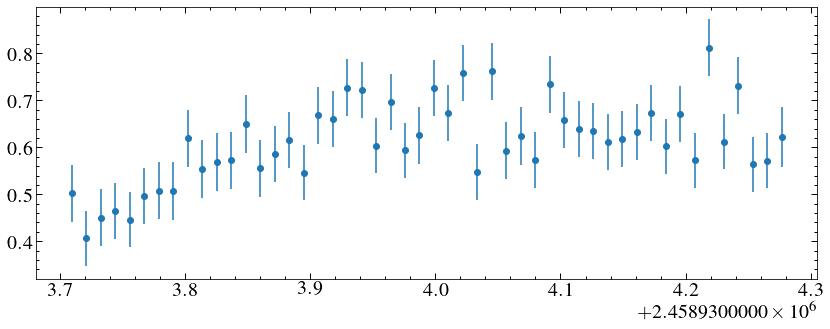

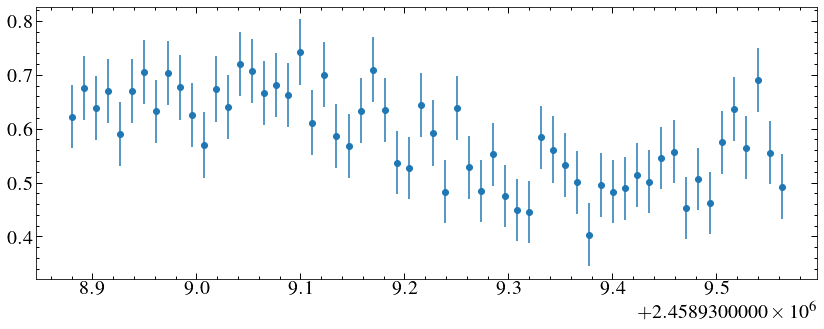

In [159]:
times = np.array([], dtype=float)
counts = np.array([], dtype=float)
error = np.array([], dtype=float)
for ob in obs:
    lc = fits.getdata('{}/lc'.format(ob), 1)   
    bg = fits.getdata('{}/lc_bg'.format(ob), 1)
    bgscale = fits.getheader('{}/lc_bg'.format(ob), 1)['BACKSCAL']
    mjdref = fits.getheader('{}/lc'.format(ob), 1)['MJDREF']
#     print(lc['AREA'])
#     print(bg['AREA'])
    t, c, ce, bgc, bgce = lc['TIME']*u.s, lc['COUNT_RATE'], lc['COUNT_RATE_ERR'], bg['COUNT_RATE']/bgscale, bg['COUNT_RATE_ERR']//bgscale
    t = (t.to(u.d).value + mjdref+ 2400000.5)*u.d
    nc = c-bgc
    ne = (ce**2+bgce**2)**0.5
    plt.errorbar(t[1:-1].value, nc[1:-1], yerr=ne[1:-1], marker='o', ls='none')
    times = np.concatenate((times, t[1:-1]))
    counts = np.concatenate((counts, nc[1:-1]))
    error = np.concatenate((error, ne[1:-1]))
    plt.show()

In [131]:
# lc1[1].header

<ErrorbarContainer object of 3 artists>

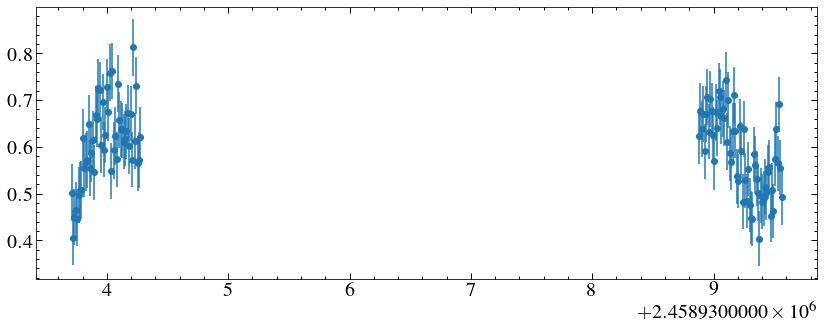

In [160]:
plt.errorbar(times.value, counts, yerr=error, marker='o', ls='none')

In [133]:
# tfold = time/(1.1468*u.d.to(u.s)) % 1

In [134]:
# plt.errorbar(tfold, counts, yerr=error, marker='o', ls='none')

In [178]:
lc = lk.LightCurve(time = times, flux=counts, flux_err=error)

<AxesSubplot:xlabel='Time [JD]', ylabel='Flux'>

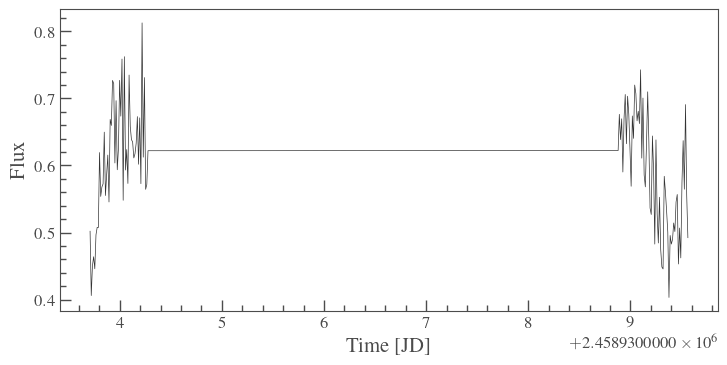

In [179]:
lc.plot()

<AxesSubplot:xlabel='Phase', ylabel='Flux'>

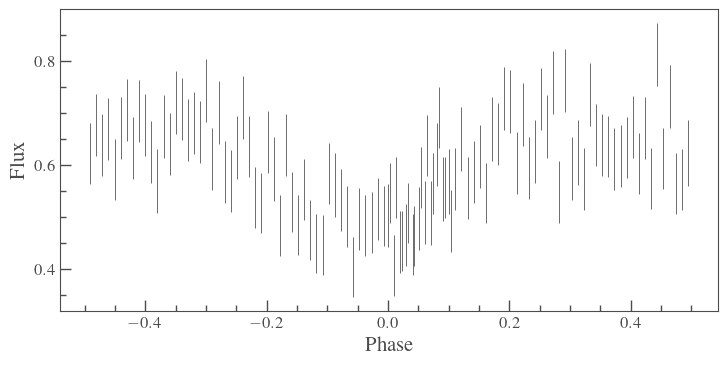

In [180]:
lcf = lc.fold(1.1468*u.d, normalize_phase=True)
lcf.errorbar()

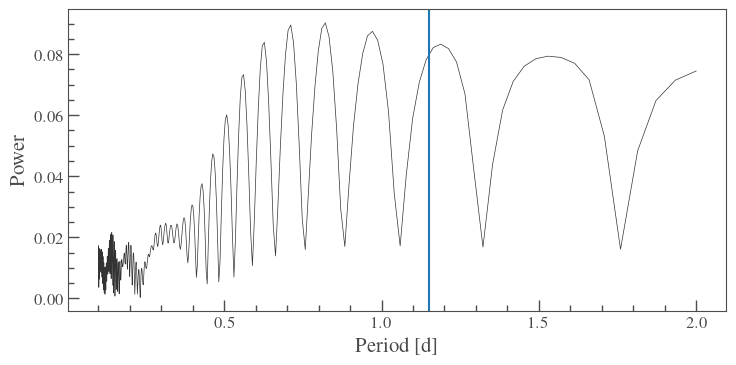

In [164]:
pg = lc.to_periodogram(oversample_factor=10, minimum_period=0.1*u.d, maximum_period=2*u.d)
pg.plot()
plt.axvline(1.15)

In [181]:
search_result = lk.search_lightcurve('GD 394')
print(search_result)

SearchResult containing 6 data products.

 #     mission     year   author  exptime target_name distance
                                     s                 arcsec 
--- -------------- ---- --------- ------- ----------- --------
  0 TESS Sector 15 2019      SPOC     120   259773610      0.0
  1 TESS Sector 15 2019 TESS-SPOC    1800   259773610      0.0
  2 TESS Sector 15 2019       QLP    1800   259773610      0.0
  3 TESS Sector 16 2019      SPOC     120   259773610      0.0
  4 TESS Sector 16 2019 TESS-SPOC    1800   259773610      0.0
  5 TESS Sector 16 2019       QLP    1800   259773610      0.0


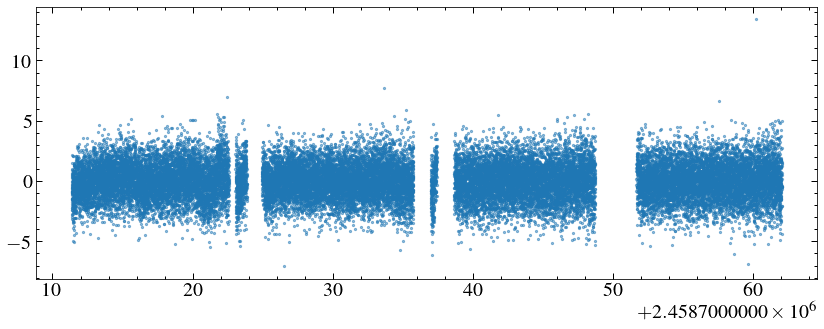

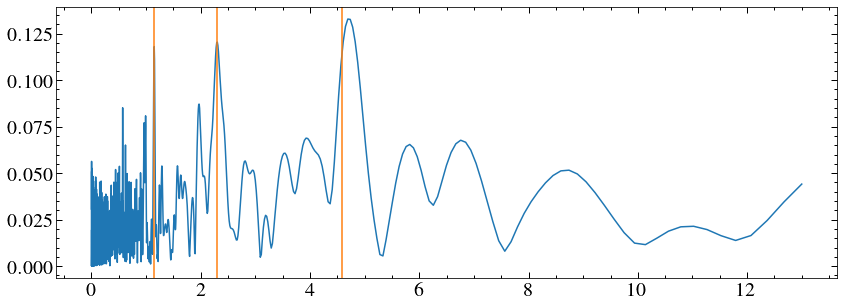

In [224]:
for result in [0, 3]:
    lcti = search_result[result].download(download_dir='data/').remove_nans()
    # lct.plot()
    lcti = lcti.flatten(10001).normalize(unit ='percent')
    lcti.flux -=100*u.percent
    lcti.time +=2457000
    # lct.plot();
    if result == 0:
        lct = lcti
    else:
        lct = lct.append(lcti)
plt.scatter(lct.time.value, lct.flux.value, s=5, alpha = 0.5, rasterized=True)
plt.show()
pgt = lct.to_periodogram(method='ls',oversample_factor=10, minimum_period=4*u.min, maximum_period = 13*u.d)
plt.plot(pgt.period, pgt.power)
plt.axvline(1.1468, c='C1')
plt.axvline(1.1468*2, c='C1')
plt.axvline(1.1468*4, c='C1')

<AxesSubplot:xlabel='Time [JD]', ylabel='Flux'>

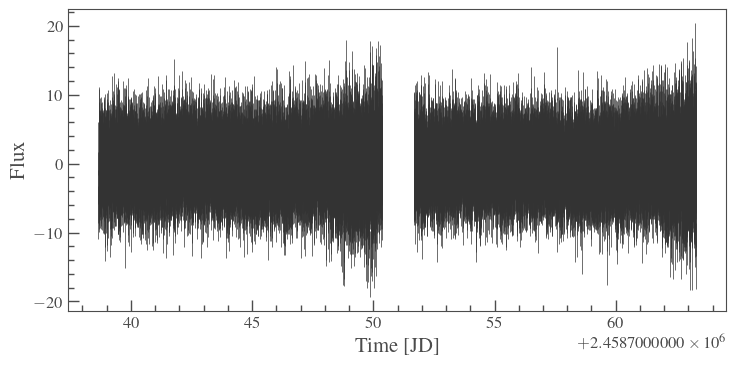

In [228]:
s15fits = '../../tess/tess_fits_files/tess2019226182529-s0015-0000000259773610-0151-s_lc.fits'
s16fits = '../../tess/tess_fits_files/tess2019253231442-s0016-0000000259773610-0152-s_lc.fits'



for i, ft in enumerate([s15fits, s16fits]):
    data = fits.getdata(ft, 1)
    t, f, e, q = data['TIME'], data['PDCSAP_FLUX'], data['PDCSAP_FLUX_ERR'], data['QUALITY']
    t, f, e = t[q==0], f[q==0], e[q==0]
    fit = np.polyval((np.polyfit(t,f,2)), t)
    f = (f/fit)-1
    e = (e/fit)
    lct = lk.LightCurve(time=t, flux=f, flux_err=e ).remove_outliers(sigma=5)
    lct.flux *=100
    lct.flux_err*=100
    if i == 0:
        lc15 = lct
    else:
        lc16= lct
        lct +=lct
lct.time +=2457000
lct.errorbar()

<AxesSubplot:xlabel='Time [JD]', ylabel='Flux'>

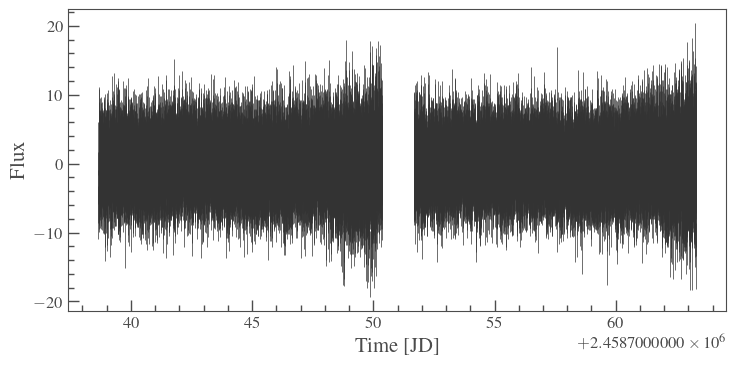

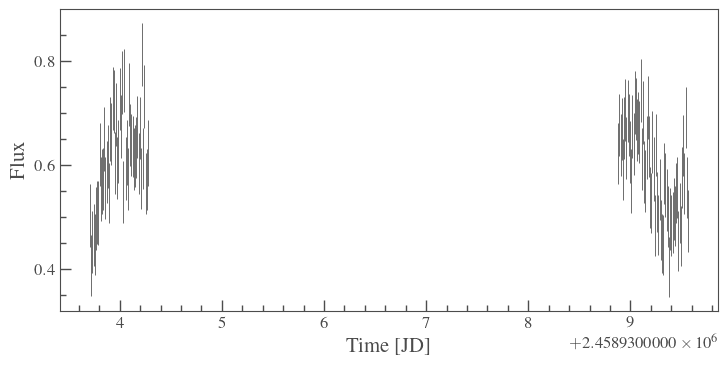

In [229]:
lct.errorbar()
lc.errorbar()

In [242]:
# ip_peg = coord.SkyCoord("23:23:08.55", "+18:24:59.3", unit=(u.hourangle, u.deg), frame='icrs')
gd394 = coord.SkyCoord("21:12:44.04", "+50:06:17.9",unit=(u.hourangle, u.deg), frame='icrs')
pole = coord.EarthLocation(0, 0, 0*u.m) 
# times2 = time.Time([56325.95833333, 56325.978254], format='mjd', scale='utc', location = pole) 
times2 = time.Time([times], format='mjd', scale='utc', location = pole)
ltt_bary = times2.light_travel_time(gd394)   
# lc.time = ((times2.utc +ltt_bary).value)*u.d


/home/david/anaconda3/envs/astroconda/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 110 of "dubious year (Note 3)"
  ErfaWarning)
/home/david/anaconda3/envs/astroconda/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utcut1" yielded 110 of "dubious year (Note 3)"
  ErfaWarning)
/home/david/anaconda3/envs/astroconda/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "taiutc" yielded 110 of "dubious year (Note 4)"
  ErfaWarning)
/home/david/anaconda3/envs/astroconda/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "epv00" yielded 110 of "warning: date outsidethe range 1900-2100 AD"
  ErfaWarning)


<AxesSubplot:xlabel='Phase [JD]', ylabel='Flux'>

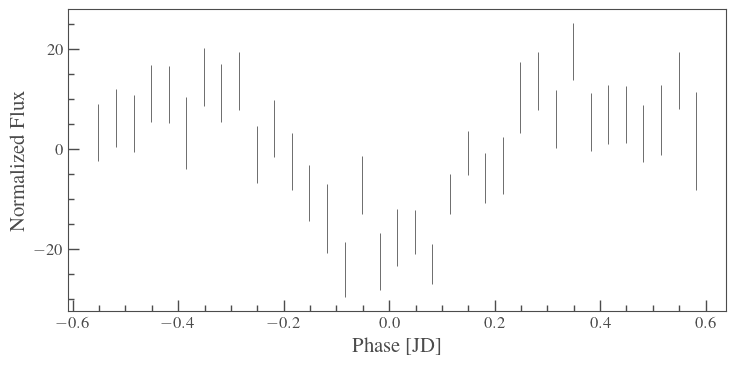

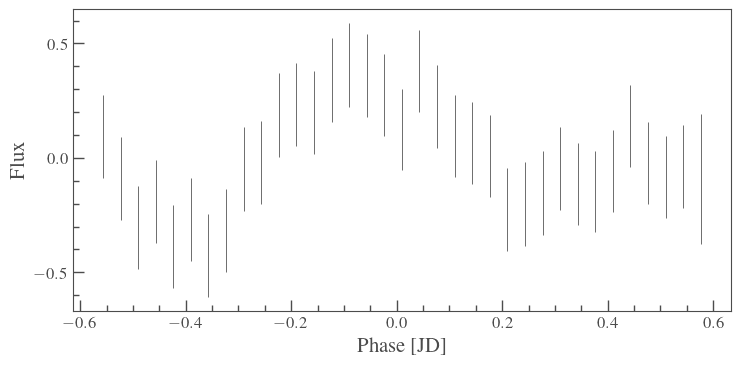

In [243]:
lcn = lc.normalize()
lcn.flux -= 1
lcn.flux *= 100
lcn.flux_err *= 100


eph = 2458737.560*u.d
period = 1.1468*u.d

clcf = lcn.fold(period, epoch_time=eph).bin(0.8*u.hr)
tlcf = lct.fold(period, epoch_time=eph).bin(0.8*u.hr)

clcf.errorbar()
tlcf.errorbar()

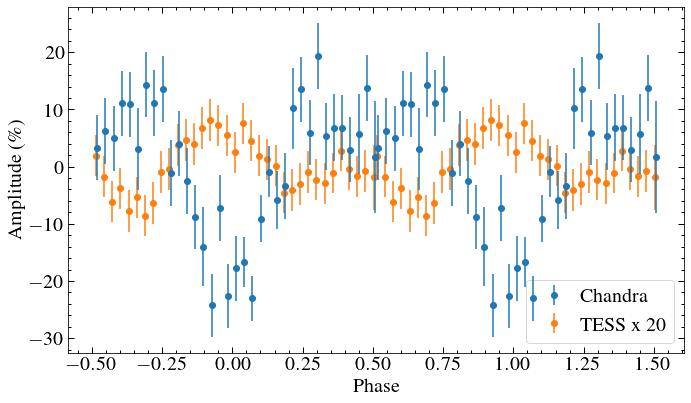

In [244]:
scale = 20

plt.figure(figsize=(10, 6))

plt.errorbar(clcf.time/(period), clcf.flux, yerr=clcf.flux_err, marker='o', ls='none', label = 'Chandra', zorder=10, c='C0')
plt.errorbar(tlcf.time/(period), tlcf.flux*scale, yerr=tlcf.flux_err*scale, marker='o', ls='none', label = 'TESS x {}'.format(scale), c='C1')
plt.errorbar((clcf.time/period)+1, clcf.flux, yerr=clcf.flux_err, marker='o', ls='none', zorder=10, c='C0')
plt.errorbar((tlcf.time/period)+1, tlcf.flux*scale, yerr=tlcf.flux_err*scale, marker='o', ls='none', c='C1')
plt.legend(frameon=True, loc=4)
plt.xlabel('Phase')
plt.ylabel('Amplitude (\%)')
plt.tight_layout()
# plt.savefig('plots/chandra_v_tess.pdf', dpi = 150)
# plt.savefig('plots/chandra_v_tess.png', dpi = 150)

Model: Sine1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
        amplitude         frequency            phase      
    ----------------- ------------------ -----------------
    5.561245941314816 0.8715343534487112 1124.486689903775
Period = 1.1474017014279965 0.02642894865691009


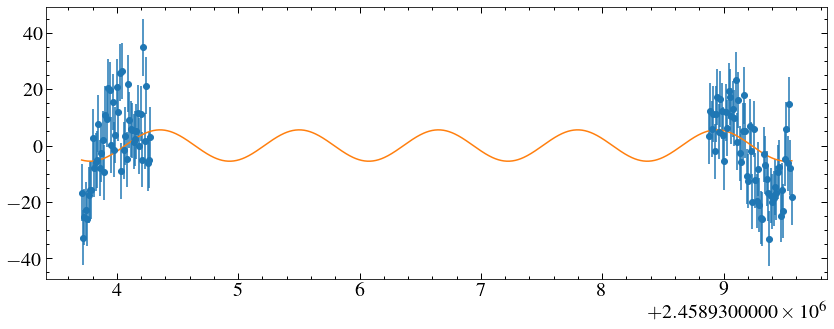

In [245]:
fitter = fitting.LevMarLSQFitter()
sin_mod =  models.Sine1D(amplitude=25, frequency=1/period.value, phase=0.)
sin_fit = fitter(sin_mod, lcn.time.value, lcn.flux.value, weights = 1/lcn.flux_err.value, maxiter=10000)
sin_fit_e = np.sqrt(np.diag(fitter.fit_info['param_cov']))

timefit = np.linspace(lcn.time[0].value, lcn.time[-1].value, 1000)
plt.errorbar(lcn.time.value, lcn.flux, yerr=lcn.flux_err, marker='o', ls='none')
plt.plot(timefit, sin_fit(timefit))
print(sin_fit)
print('Period =', 1/sin_fit.frequency.value, sin_fit_e[1]/(sin_fit.frequency.value**2))

Model: Sine1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
       amplitude     frequency       phase       
    ---------------- --------- ------------------
    13.7068915792331    1.1468 0.7478905306636476


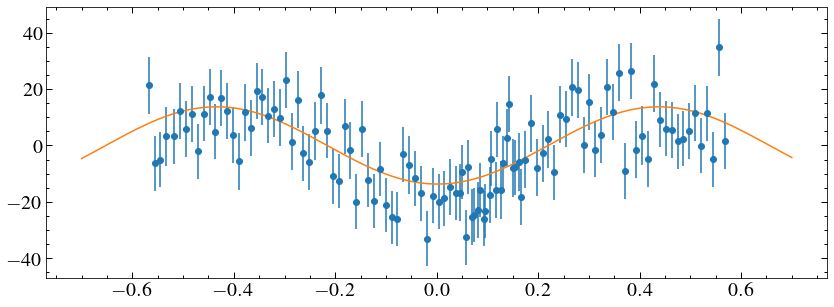

Model: Sine1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
         amplitude      frequency       phase      
    ------------------- --------- -----------------
    0.22659375668595294    1.1468 0.298028269316386


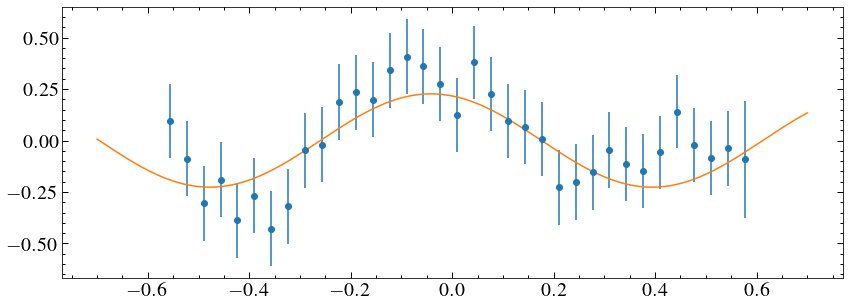

In [246]:
clcf2 = lcn.fold(period, epoch_time=eph)


sin_mod =  models.Sine1D(amplitude=25, frequency=period.value, phase=0.5, fixed=dict(frequency=True))
sin_fit = fitter(sin_mod, clcf2.time.value, clcf2.flux.value, weights = 1/clcf2.flux_err.value, maxiter=10000)
sin_fit_e = np.sqrt(np.diag(fitter.fit_info['param_cov']))

timefit = np.linspace(-0.7, 0.7, 1000)
plt.errorbar(clcf2.time.value, clcf2.flux, yerr=clcf2.flux_err, marker='o', ls='none')
plt.plot(timefit, sin_fit(timefit))
print(sin_fit)

plt.show()

tlcf2 = lct.fold(period, epoch_time=eph).bin(0.8*u.hr)


sin_mod =  models.Sine1D(amplitude=0.1, frequency=period.value, phase=0, fixed=dict(frequency=True))
tsin_fit = fitter(sin_mod, tlcf2.time.value, tlcf2.flux.value, weights = 1/tlcf2.flux_err.value, maxiter=10000)
tsin_fit_e = np.sqrt(np.diag(fitter.fit_info['param_cov']))

timefit = np.linspace(-0.7, 0.7, 1000)
plt.errorbar(tlcf2.time.value, tlcf2.flux, yerr=tlcf2.flux_err, marker='o', ls='none')
plt.plot(timefit, tsin_fit(timefit))
print(tsin_fit)
# print('Period =', 1/sin_fit.frequency.value, sin_fit_e[1]/(sin_fit.frequency.value**2))




In [247]:
0.7478905306636476-0.298028269316386



0.44986226134726165

In [213]:
from astropy.modeling.models import custom_model
from astropy.modeling.fitting import LevMarLSQFitter

@custom_model
def spot_model(x, gamma=1, U=1, kw=0., beta=0, i = np.pi/2, lam=np.pi):
    #phi = np.linspace(0, 360, 100)
    y = np.array([counts_at_phi(p*2*np.pi, gamma, U, kw, beta, i, lam) for p in x+0.5])
    return y
    

def counts_at_phi(phi, gamma, U, kw, beta, i, lam):
    z0 = get_z0(phi, beta, i, lam)
    eps0, reg, d = coverage(phi, gamma, z0) 
    c = U*(1-(1-kw)*eps0)
    return c

def coverage(phi, gamma, z0):
    k = np.sin(gamma)
    d = ((1-k**2)*(1-z0**2))**0.5 
    if  d <= (1 - k**2) and gamma >=np.pi/2:
        eps = 1.0
        reg= 1
    elif  d <= (1 - k**2):
        reg= 2
        eps = (k**2)*z0
    elif  d > (1 - k**2):
        reg= 3
        s = (1 - k**2)/d 
        v = (d - s) / (k*z0)
        eps = (1/np.pi) *( np.arccos(s) - (s*(1-s**2)**0.5) + ( (k**2) * z0*(np.arccos(v) - (v*(1-v**2)**0.5))))
        
    if eps < 0:
        eps = 0 #hack? I guess? It fixes it?
        
    return eps, reg, d

def get_z0(phi, beta, i, lam):
    z0 = np.cos(lam - phi) * np.cos(beta) * np.sin(i) + np.sin(beta) * np.cos(i)
    return z0

Model: spot_model
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
          gamma                U           kw        beta                i                 lam        
    ------------------ ------------------ --- ------------------ ------------------ ------------------
    0.6169848642963365 0.6584977460681928 0.0 0.3531653855630311 1.9238627546587737 3.1111473249091244


<spot_model(gamma=0.61698486, U=0.65849775, kw=0., beta=0.35316539, i=1.92386275, lam=3.11114732)>

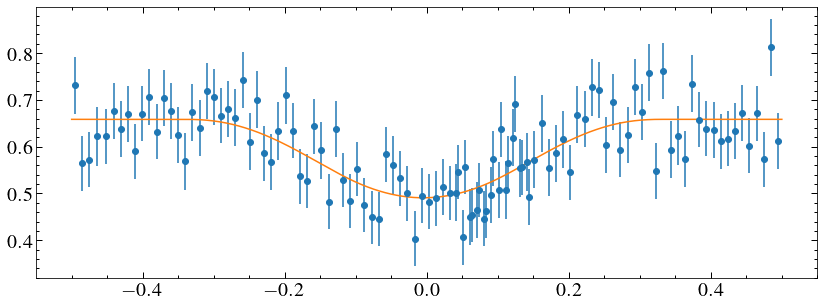

In [214]:



clcf2 = lc.fold(period, normalize_phase=True,  epoch_time=eph)
uchandra = np.mean([np.mean(clcf2.flux[:5]), np.mean(clcf2.flux[-6:])])
dgamma = 35.55*np.pi/180
dbeta = 43.193*np.pi/180 

# sin_mod =  models.Sine1D(amplitude=25, frequency=1, phase=0.5, fixed=dict(frequency=True))
# sin_fit = fitter(sin_mod, clcf2.time.value, clcf2.flux.value, weights = 1/clcf2.flux_err.value, maxiter=10000)
# sin_fit_e = np.sqrt(np.diag(fitter.fit_info['param_cov']))

timefit = np.linspace(-0.5, 0.5, 1000)

spot_init = spot_model(gamma=dgamma, U=uchandra, kw = 0.0, beta=dbeta, fixed=dict(gamma=False, U=False, beta=False, i=False, lam=False, kw=True))#, bounds = dict(kw=[0.0, 1]))

spot_fit = fitter(spot_init, clcf2.time.value,clcf2.flux.value, weights=1/clcf2.flux_err.value, maxiter=100000)
spot_fit_e = np.sqrt(np.diag(fitter.fit_info['param_cov']))



plt.errorbar(clcf2.time.value, clcf2.flux, yerr=clcf2.flux_err, marker='o', ls='none')
# plt.plot(timefit, sin_fit(timefit))
plt.plot(timefit, spot_fit(timefit))
print(spot_fit)
# print('Period =', 1/sin_fit.frequency.value, sin_fit_e[1]/(sin_fit.frequency.value**2))
spot_fit

Now in CYBER!!!

In [215]:
# import mplcyberpunk
# plt.style.use("cyberpunk")

In [216]:
# scale = 20
# bintime = 0.9*u.hr
# clcf = lcn.fold(period, epoch_time=eph).bin(bintime)
# tlcf = lct.fold(period, epoch_time=eph).bin(bintime)

# plt.figure(figsize=(12, 7))






# plt.errorbar(clcf.time/period, clcf.flux, yerr=clcf.flux_err, marker='o', ls='none', label = 'Chandra', zorder=10, c='C0')
# plt.errorbar(tlcf.time/period, tlcf.flux*scale, yerr=tlcf.flux_err*scale, marker='o', ls='none', label = 'TESS x {}'.format(scale), c='C1')
# plt.errorbar((clcf.time/period)+1, clcf.flux, yerr=clcf.flux_err, marker='o', ls='none', zorder=10, c='C0')
# plt.errorbar((tlcf.time/period)+1, tlcf.flux*scale, yerr=tlcf.flux_err*scale, marker='o', ls='none', c='C1')

# plt.plot(timefit, (((spot_fit(timefit)/np.median(clcf2.flux.value))-1)*100),c='C3', ls='--', label = 'Spot model')
# plt.plot(timefit+1, (((spot_fit(timefit)/np.median(clcf2.flux.value))-1)*100),c='C3', ls='--')
# plt.legend(loc=8,frameon=True)

# # mplcyberpunk.add_glow_effects()
# mplcyberpunk.make_lines_glow()


# plt.xlabel('Phase',size=25)
# plt.ylabel('Amplitude (\%)',size=25)
# plt.tight_layout()
# plt.savefig('plots/chandra_v_tess_cp.pdf', dpi = 300)
# plt.savefig('plots/chandra_v_tess_cp.png', dpi = 300)

In [217]:
# scale = 20
# bintime = 0.9*u.hr
# clcf = lcn.fold(period, epoch_time=eph).bin(bintime)
# tlcf = lct.fold(period, epoch_time=eph).bin(bintime)

# plt.figure(figsize=(12, 7))






# plt.errorbar(clcf.time/period, clcf.flux, yerr=clcf.flux_err, marker='o', ls='none', label = 'Chandra', zorder=10, c='C0')
# plt.errorbar(tlcf.time/period, tlcf.flux*scale, yerr=tlcf.flux_err*scale, marker='o', ls='none', label = 'TESS x {}'.format(scale), c='C1')
# # plt.errorbar((clcf.time/period)+1, clcf.flux, yerr=clcf.flux_err, marker='o', ls='none', zorder=10, c='C0')
# # plt.errorbar((tlcf.time/period)+1, tlcf.flux*scale, yerr=tlcf.flux_err*scale, marker='o', ls='none', c='C1')

# plt.plot(timefit, (((spot_fit(timefit)/np.median(clcf2.flux.value))-1)*100),c='C3', ls='--', label = 'Spot model')
# # plt.plot(timefit+1, (((spot_fit(timefit)/np.median(clcf2.flux.value))-1)*100),c='C3', ls='--')
# plt.legend(loc=3,frameon=True)

# # mplcyberpunk.add_glow_effects()
# mplcyberpunk.make_lines_glow()


# plt.xlabel('Phase',size=25)
# plt.ylabel('Amplitude (\%)',size=25)
# plt.tight_layout()
# # plt.savefig('plots/chandra_v_tess_cp.pdf', dpi = 300)
# # plt.savefig('plots/chandra_v_tess_cp.png', dpi = 300)

In [218]:
# def make_stars(min_x, max_x, min_y, max_y, stars=150):
#     y = np.random.uniform(min_y, max_y, stars)
#     x = np.random.uniform(min_x, max_x, stars)
#     alpha_multiplier = np.random.uniform(.5, 1, len(x))
#     size = np.random.uniform(1, 6, len(x))

#     return np.array([x, y, alpha_multiplier, size]).T

# plt.figure(figsize=(14, 9))

# plot_rad = 2
# ax = plt.axes(xlim=(-plot_rad, plot_rad), ylim=(-plot_rad, plot_rad))
# stars = make_stars(-plot_rad, plot_rad, -plot_rad, plot_rad)
# for star in stars:
#         alpha = np.random.uniform(0.5, 1)
#         ax.scatter(star[0], star[1], s=star[2], alpha=alpha,
#                    c='#ffffff', zorder=0)
#         dark = np.random.uniform(0.1, .3)
#         ax.scatter(star[0], star[1], s=star[2], alpha=dark,
#                    c='#000000', zorder=0)
# plt.xticks(visible=False)
# plt.yticks(visible=False)
# plt.tight_layout()
# plt.subplots_adjust(bottom=0, top=1, left=0, right=1)
# plt.savefig('plots/poster_background.png', dpi=300)

Doing a cyberpunk stis diagram.Getting stuff from paper_stis_plot.py

In [219]:
# def cont_masker( x, b,r ):
#     """
#     creates a mask for a spectrum that regions between pairs from a file
#     """
#     C = np.zeros_like(x,dtype='bool')
#     for i in range(len(b)):
#         C |= (x>b[i])&(x<r[i])
#     return ~C

# def normaliser(w,f,e,mask): #produces a normalised flux
#     nf=f/np.polyval((np.polyfit(w[mask],f[mask],3)), w)
#     ne=e/np.polyval((np.polyfit(w[mask],f[mask],3)), w)
#     return nf, ne


# # si_lines=[1194.496,1264.738,1294.545,1296.726,1298.892,1301.149,1303.323,1393.755,1402.770]
# # al_lines=[1379.670,1384.132,1605.766,1611.873]
# # fe_lines=[1525.036,1525.798,1527.141,1531.640,1533.450,1538.629,1539.123,1540.164,1543.623,
# #           1547.637,1550.193,1556.076,1523.923,1532.630,1542.698,
# #           1552.349,1553.296] #some cut to avoid overlap
# si_lines=[1294.545,1296.726,1298.892,1301.149,1303.323]#,1393.755,1402.770]



# #phase=[0.0,0.8,0.9,1.6,2.4,3.1,3.5,4.3]

# interstellar=[1302.125,1304.34,1526.657]

# dates=[
#        '2015:08:20:19:05:13',
#        '2015:08:21:15:45:25',
#        '2015:08:21:18:56:37',
#        '2015:08:22:15:38:36',
#        '2015:08:23:12:20:34',
#        '2015:08:24:09:02:39',
#        '2015:08:24:20:01:05',
#        '2015:08:25:16:43:59',
#        ]


# spectra=['GD394_added_STIS_visit_01.dat', 'GD394_added_STIS_visit_06.dat', #phase folded
# 	 'GD394_added_STIS_visit_08.dat','GD394_added_STIS_visit_05.dat',
# 	 'GD394_added_STIS_visit_07.dat', 'GD394_added_STIS_visit_04.dat',
# 	 'GD394_added_STIS_visit_02.dat','GD394_added_STIS_visit_03.dat']

# spectra=spectra[::-1]

# data_loc='../../spectra/added/'

# cw, cf, ce = np.loadtxt(data_loc+'GD394_added_STIS_all.dat', unpack = True)
# b, r = np.loadtxt('../../continuum.txt',unpack=True)

# phase=[0.0, 0.1,0.3, 0.4, 0.5, 0.6, 0.8, 0.9]  

# cols = np.linspace(0, 1, len(spectra))
# plt.figure(figsize=(8,11))
# # plt.subplots_adjust(left=0.08, right=0.99, top=0.99, bottom=0.08, wspace=0.01, hspace=0.06)

# for j in range(len(spectra)):
#     spectrum=spectra[::-1][j]

#     w,f,e=np.loadtxt(data_loc+spectrum, unpack=True)
#     chop_mask=w>1165 #chops dodgy end off spectrum_file
#     w,f,e,=w[chop_mask],f[chop_mask],e[chop_mask]

#     mask=cont_masker(w,b,r)
#     f,e=normaliser(w,f,e,mask) #normalises flux

#     cmask=cont_masker(cw,b,r)
#     cf2,ce2=normaliser(cw,cf,ce,cmask) #normalises flux
    
#     if j == 0:
#         plt.plot(w,f+j,c=plt.cm.cool(cols[j]), label ='Phased spectrum')
# #         plt.plot(cw,cf2+j,c='C2', ls='--', label='Average Spectrum')
#     else:
#         plt.plot(w,f+j,c=plt.cm.cool(cols[j]))
# #         plt.plot(cw,cf2+j,c='C2', ls='--')
#     if j == 0:
#         fi = np.zeros(len(w))
#     else:
#         fi = interp1d(wi, fi, fill_value='extrapolate')(w)
#     plt.fill_between(w, fi, f+j, color=plt.cm.cool(cols[j]), alpha=0.1, zorder=-10)
#     fi = f+j
#     wi = w
            
            
        
#     #if j == len(spectra):
#      #   plt.fill_between(w, f, -0.6, color=plt.cm.cool(cols[n-1]), alpha=0.1, zorder=-10)

# #     plt.annotate( phase[::-1][j], (0.05, 1.3+j), xycoords=('axes fraction','data'), size=20)

# # mplcyberpunk.add_glow_effects()
# mplcyberpunk.make_lines_glow()
    
    
# delv=27.0 #doppler shift in kms-1(?)
# c=2.998E5 #speed  of light in kms-1

# for si in si_lines:
#     plt.annotate('Si\,{\sc iii}\n$|$',(si*(1.0+(delv/c)),8.4),size=20,ha='center') 
# # for inter in interstellar:
# #     plt.axvline(inter, c='0.3', ls='--')

# plt.xlim(1293, 1305)
# plt.ylim(0.001,9.2)
# plt.xlabel('Wavelength (\AA)',size=25)
# # plt.ylabel('Normalised Flux',size=25)
# plt.ylabel('Phase',size=25)
# plt.yticks(np.arange(1, 9), phase[::-1])
# plt.tight_layout()
# plt.savefig('plots/stis_spec_cp.png',dpi=300)


In [220]:
# lc1 = fits.open('{}/lc_bg'.format(obs[0]))

In [221]:
# lc1[1].header['HISTORY']

In [222]:
# lc = fits.getdata('/media/david/2tb_ext_hd/hddata/gd394/chandra/working/test_2118.fits', 1)
# bg = fits.getdata('/media/david/2tb_ext_hd/hddata/gd394/chandra/working/bgtest_2118.fits', 1)
# bgscale = fits.getheader('/media/david/2tb_ext_hd/hddata/gd394/chandra/working/bgtest_2118.fits', 1)['BACKSCAL']
# print(bgscale)
# # bgscale=10
# t, c, ce, bgc, bgce = lc['TIME']*u.s, lc['COUNT_RATE'], lc['COUNT_RATE_ERR'], bg['COUNT_RATE']/bgscale, bg['COUNT_RATE_ERR']/bgscale
# lc.names
# # len(bgc)

In [223]:
# # plt.scatter(t[:-1], c[:-1])
# # plt.scatter(t[:-1], bgc[:-1])
# err = (ce**2+bgce**2)**0.5
# plt.errorbar(t[1:-1], c[1:-1]-bgc[1:-1], yerr=err[1:-1], ls='none', marker='o')


Horray! Proving I can do it myself, although I need to learn what all the options mean.